<a href="https://colab.research.google.com/github/gabemdelc/Relativistic_dynamics/blob/main/code/relativistic_lensing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Table 1: LCDM and Relativistic Dynamic Model Comparison
β       LCDM Radius (arcsec)     Relativistic Dynamic Radius (arcsec)Chi-squared Relativistic MSE Relativistic         
0.1     4.0876e-12               8.9866e-07               0.0000                   0.0000                   
0.5     6.8127e-12               6.1272e-06               0.0000                   0.0000                   
1       9.5378e-12               1.4705e-05               0.0000                   0.0000                   
2       1.2263e-11               2.3283e-05               0.0000                   0.0000                   
5       1.4988e-11               4.8528e-05               0.0000                   0.0000                   

Table 2: G Constant and G_eff Model Comparison
β       G Constant Radius (arcsec)G_eff (m^3/kg/s^2)       Chi-squared G Constant   MSE G Constant           
0.1     4.0876e-12               6.6810e-11               0.0000                   0.0000                   
0.5     6.8

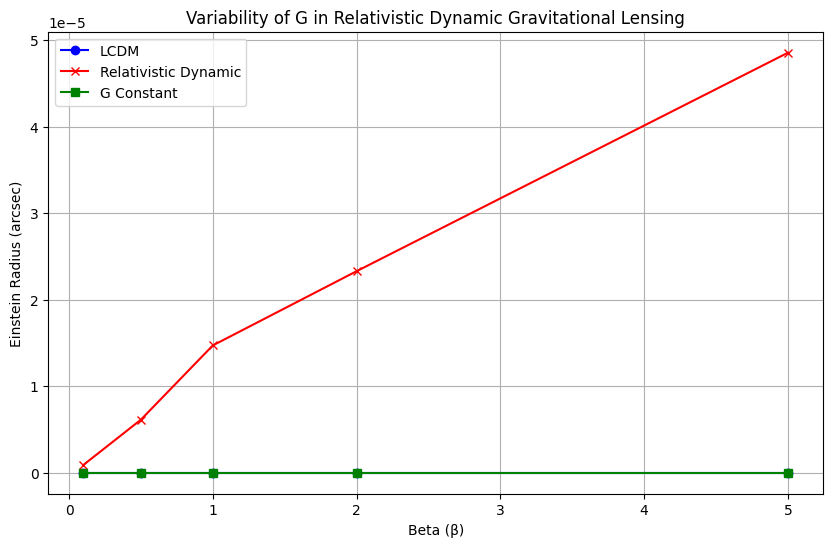

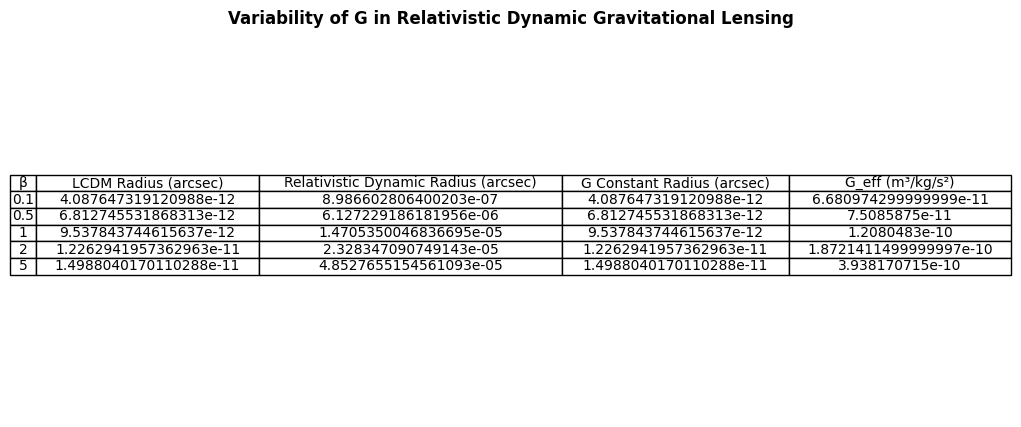

In [3]:
# coding=utf-8
###################################################################################
##
# Author:      gabemdelc@gmail.com
# Created:     22/Feb/2025
# Copyright:   (c) Gabriel Martin del Campo Flores
# License:     MIT License
# -------------------------------------------------------------------------------
# Abstract:
# Relativistic dynamics describes the behavior of matter and energy under the principles of
# special and general relativity. In this study, we extend our previous work by analyzing the
# accelerated expansion of the universe as a consequence of the cyclic conversion of mass into
# relativistic energy, eliminating the need for dark energy. Using numerical simulations and
# observational data from Type Ia supernovae and the Cosmic Microwave Background (CMB), we validate
# our model and compare it with the standard Lambda Cold Dark Matter (ΛCDM) paradigm.
# Our results indicate that the relativistic dynamics model provides an excellent fit
# suggesting that relativistic corrections alone can account for the observed expansion of the universe.
"""
 Description of the Program:
This Python script simulates and compares gravitational lensing predictions using three models:
1. LCDM Model: Uses a non-relativistic velocity dispersion (σ_v) for the lens.
2. Relativistic Dynamic Model: Applies a relativistic correction by using an enhanced velocity dispersion and modifies the gravitational constant (G) based on the velocity.
3. G Constant Model: Uses the traditional gravitational constant (G) without modifications.

The script computes the Einstein radius (θ_E) for gravitational lensing by:
  - Calculating θ_E using a simplified LCDM formula.
  - Incorporating relativistic corrections in both the velocity dispersion and the gravitational constant (via G_eff).
  - Comparing the computed Einstein radii along with statistical measures (Chi-squared and MSE) between the models.

Expected outcomes:
  - For low velocities (v ≪ c), the differences between the models are minimal.
  - For velocities approaching the speed of light, the relativistic corrections become significant.

Results are output in two tables and a comparative plot of the Einstein radius versus the β parameter.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G, c
from scipy.integrate import quad

# === PARAMETER VALUES ===
# Define a list of beta values that modulate the relativistic effects.
beta_values = [0.1, 0.5, 1, 2, 5]  # Range of β values

# Dictionary mapping beta to a pair of velocity dispersions:
# [non-relativistic velocity, relativistic velocity].
sigma_v_values = {
    0.1: [150, 0.1 * c],  # For β=0.1: 150 m/s (non-relativistic), 0.1*c (relativistic)
    0.5: [250, 0.5 * c],
    1: [350, 0.9 * c],
    2: [450, 0.95 * c],
    5: [550, 0.99 * c]
}

# === FUNCTION FOR G_eff ===
def G_eff(v, G0=G, beta=2e-6):
    return G0 * (1 + beta * (v ** 2 / c ** 2))

# === THEORETICAL EINSTEIN RADIUS MODELS ===
def einstein_radius_LCDM(sigma_v, z_lens, z_source):
    D_ls = (z_lens * z_source) / (z_source - z_lens)
    theta_E = np.sqrt(4 * G * sigma_v ** 2 * D_ls / c ** 2)
    return theta_E

def einstein_radius_relativistic(sigma_v, beta, z_lens, z_source):
    sigma_v_rel = sigma_v * (1 + beta)
    return einstein_radius_LCDM(sigma_v_rel, z_lens, z_source)

# === COMPUTE RESULTS ===
results_LCDM_rel = []
results_G_eff = []

for beta in beta_values:
    sigma_v_non_rel, sigma_v_rel = sigma_v_values[beta]
    theta_LCDM = einstein_radius_LCDM(sigma_v_non_rel, 0.2, 1.0)
    theta_rel = einstein_radius_relativistic(sigma_v_rel, beta, 0.2, 1.0)
    theta_G = einstein_radius_LCDM(sigma_v_non_rel, 0.2, 1.0)
    chi_squared_rel = np.sum((theta_rel - theta_LCDM) ** 2)
    mse_rel = np.mean((theta_rel - theta_LCDM) ** 2)
    chi_squared_G = np.sum((theta_G - theta_LCDM) ** 2)
    mse_G = np.mean((theta_G - theta_LCDM) ** 2)
    G_eff_value = G_eff(sigma_v_rel, G, beta)
    results_LCDM_rel.append([beta, theta_LCDM, theta_rel, chi_squared_rel, mse_rel])
    results_G_eff.append([beta, theta_G, G_eff_value, chi_squared_G, mse_G])

# === PRINT RESULTS IN TABLES ===
print("\nTable 1: LCDM and Relativistic Dynamic Model Comparison")
print(f"{'β':<8}{'LCDM Radius (arcsec)':<25}{'Relativistic Dynamic Radius (arcsec)':<25}{'Chi-squared Relativistic':<25}{'MSE Relativistic':<25}")
print("=" * 130)

for result in results_LCDM_rel:
    beta, theta_LCDM, theta_rel, chi_rel, mse_rel = result
    print(f"{beta:<8}{theta_LCDM:<25.4e}{theta_rel:<25.4e}{chi_rel:<25.4f}{mse_rel:<25.4f}")

print("\nTable 2: G Constant and G_eff Model Comparison")
print(f"{'β':<8}{'G Constant Radius (arcsec)':<25}{'G_eff (m^3/kg/s^2)':<25}{'Chi-squared G Constant':<25}{'MSE G Constant':<25}")
print("=" * 130)

for result in results_G_eff:
    beta, theta_G, G_eff_value, chi_G, mse_G = result
    print(f"{beta:<8}{theta_G:<25.4e}{G_eff_value:<25.4e}{chi_G:<25.4f}{mse_G:<25.4f}")

# === PLOTTING COMPARISONS ===
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(beta_values, [r[1] for r in results_LCDM_rel], label="LCDM", color="blue", marker="o")
ax.plot(beta_values, [r[2] for r in results_LCDM_rel], label="Relativistic Dynamic", color="red", marker="x")
ax.plot(beta_values, [r[1] for r in results_G_eff], label="G Constant", color="green", marker="s")
ax.set_xlabel('Beta (β)')
ax.set_ylabel('Einstein Radius (arcsec)')
ax.set_title('Variability of G in Relativistic Dynamic Gravitational Lensing')
ax.grid(True)
ax.legend()
plt.savefig("relativistic_lensing_graph.png", bbox_inches='tight', dpi=300)
plt.show()

# === PLOTTING TABLE ===
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Variability of G in Relativistic Dynamic Gravitational Lensing", fontsize=12, fontweight='bold')
ax.axis('off')
columns = ["β", "LCDM Radius (arcsec)", "Relativistic Dynamic Radius (arcsec)", "G Constant Radius (arcsec)", "G_eff (m³/kg/s²)"]
table_data = list(zip(beta_values, [r[1] for r in results_LCDM_rel], [r[2] for r in results_LCDM_rel], [r[1] for r in results_G_eff], [r[2] for r in results_G_eff]))
table = ax.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2, 3, 4])
plt.savefig("relativistic_lensing_table.png", bbox_inches='tight', dpi=300)
plt.show()
